# Worksheet 3

In [1]:
%matplotlib inline

# Questions

## Question 1

Apply Simpson's rule to compute

$$
  \int_0^{\pi/2} \cos (x) \, dx
$$

using 3 points (so $h = \pi/4$) and 5 points (so $h = \pi/8$).

## Question 2

Apply Richardson extrapolation to the result above; does the answer improve?

## Question 3

State the rate of convergence of the trapezoidal rule and Simpson’s rule, and sketch (or explain in words) the proof.

## Question 4

Explain in words adaptive and Gaussian quadrature, in particular the aims of each and the times when one or the other is more useful.

## Question 5

Show how the speed of convergence of a nonlinear root finding method depends and the derivatives of the map $g(x)$ near the fixed point $s$.

## Question 6

Use Newton's method to find the root in $[0, 1]$ of

$$
  f(x) = \sin (x) − e^x + 0.9 + x.
$$

Start from $x_0 = 1/2$ and retain 3 significant figures. Take 3 steps.

## Coding Question 1

Write a single function that, depending on an input argument, computes the integral of an input function $f(x)$ between the input arguments $a, b$, using either

1. Simpson's rule, 3 points
2. Trapezoidal rule, 3 points
3. Gaussian Quadrature, 3 nodes.

Test your code on

$$
\begin{aligned}
  \int_0^1 \sin^2 ( \pi x ) & = \frac{1}{2}, \\
  \int_0^1 e^{-x} \sinh ( x ) d x & \approx 0.283833821 \\
  \int_0^1 \frac{1}{\sqrt{x}} d x & = 2.
\end{aligned}
$$

Note that there are good reasons for some of the methods to fail on the final test!

## Coding Question 2

Implement the secant method to find the root of

$$
  f(x) = \tan (x) - e^{-x}, \quad x \in [0, 1].
$$

# Answers

## Question 1

Apply Simpson's rule to compute

$$
  \int_0^{\pi/2} \cos (x) \, dx
$$

using 3 points (so $h = \pi/4$) and 5 points (so $h = \pi/8$).

### Answer Question 1

The exact solution is, of course, 1.

Simpson’s rule (composite version) is

$$
  I = \frac{h}{3} \left[ f(a) + f(b) + 2 \sum_{j = 1}^{N/2 - 1} f(x_{2 j}) + 4 \sum_{j = 1}^{N/2} f(x_{2 j-1})  \right]
$$

where we are using $N + 1$ points with $N$ even, with $x_0 = a, x_N = b$, equally spaced with grid spacing $h = (b − a)/N$.

With 3 points we have $N = 2$ and $h = (\pi/2)/2 = \pi/4$, and so we have nodes and samples given by

$$
  \begin{array}{c|c|c}
    i & x_i & f(x_i) \\ \hline
    0 & 0 & 1 \\
    1 & \pi/4 & 1 / \sqrt{2} \\
    2 & \pi/2 & 0
  \end{array}
$$

Using Simpson's rule we then get

\begin{align}
  I &= \frac{h}{3} \left[ f_0 + f_2 + 4 f_1 \right] \\
    & = \frac{\pi}{12} \left[ 1 + 2 \sqrt{2} \right] \\
    & \approx 1.0023. 
\end{align}

With 5 points we have $N = 4$ and $h = (\pi/2)/4 = \pi/8$, and so we have nodes and samples given by

$$
  \begin{array}{c|c|c}
    i & x_i & f(x_i) \\ \hline
    0 & 0 & 1 \\
    1 & \pi/8 & \cos ( \pi / 8 ) \approx 0.9239 \\
    2 & \pi/4 & 1 / \sqrt{2} \\
    3 & 3\pi/8 & \cos ( 3 \pi / 8 ) \approx 0.9239 \\
    4 & \pi/2 & 0
  \end{array}
$$

Using Simpson's rule we then get

$$
\begin{aligned}
  I &= \frac{h}{3} \left[ f_0 + f_4 + 4 (f_1 + f_3) + 2 f_2 \right] \\
    & = \frac{\pi}{24} \left[ 1 + 4 \left( \cos ( \pi / 8 ) + \cos ( 3 \pi / 8 ) \right) + \sqrt{2} \right] \\
    & \approx 1.00013. 
\end{aligned}
$$

## Question 2

Apply Richardson extrapolation to the result above; does the answer improve?

### Answer Question 2

Simpson's rule has order of accuracy 4. We note that we have just computed the result using 3 ($N = 2$) and 5 ($N = 4$) points. Richardson extrapolation gives the result

$$
\begin{aligned}
  R_4 &= \frac{2^4 I_{N=4} - I_{N=2}}{2^4 - 1} \\
      &\approx 0.999992.
\end{aligned}
$$

We note that the error has gone from $2.3 \times 10^{−3}$ for $I_{N=2}$ to $1.3 \times 10^{−4}$ for $I_{N=4}$ and now to $8.4 \times 10^{−6}$ for the Richardson extrapolation $R_4$, a good improvement.

## Question 3

State the rate of convergence of the trapezoidal rule and Simpson’s rule, and sketch (or explain in words) the proof.

### Answer Question 3

For the trapezoidal rule the error converges as $h^2$. For Simpson’s rule the error converges as $h^4$.

In both cases the proof takes a similar path. Consider the quadrature over a single subinterval. Taylor series expand the quadrature rule about a suitable point $x_j$ (left edge for trapezoidal rule, centre for Simpson’s rule) to get an expression for the quadrature of the interval in terms of $h$ and the function $f$ and its derivatives as evaluated at $x_j$.

Next write down the anti-derivative $F(t)$ of $f$ for the interval as a function of the width of the interval $t$. This, when evaluated at $t = h$, is the exact solution for the quadrature of the subinterval. Taylor series expand $F$ about $t = 0$ to get an expression for the exact result in terms of $h$ and the function $f$ and its derivatives as evaluated at $x_j$.

By comparing the two expressions we have a bound on the error in terms of $h$ and derivatives of $f$. By summing over all intervals (note that at this stage we lose a power of $h$ as we have $N$ subintervals with $N \propto h^{−1}$) we can bound the global error in terms of $h$ and the maximum value of a derivative of $f$.


## Question 4

Explain in words adaptive and Gaussian quadrature, in particular the aims of each and the times when one or the other is more useful.

### Answer Question 4

Adaptive quadrature uses any standard quadrature method and some error estimator, such as Richardson extrapolation, to place additional nodes wherever required to ensure that the error is less than some desired tolerance. Each subinterval is tested to ensure that its (appropriately weighted) contribution to the total error is sufficiently small. If it is not, the subinterval is further subdivided by introducing more nodes in a fashion appropriate for the quadrature method used. This is a straightforward way of getting high accuracy for low computational cost using standard quadrature algorithms.

Gaussian quadrature aims to get the best result for a *generic* function by allowing both the choice of nodes and weights to vary. The location of the nodes and the value of the weights is given by ensuring that the quadrature is exact for as many polynomials as possible; i.e., if we have $N$ nodes (and hence $N$ weights) we should be able to exactly integrate $x^s$ for $0 \le s \le 2 N − 1$. By introducing a weighting function we can also deal with integrands that are (mildly) singular at the boundaries of the domain, or unbounded domains. Provided the function can be evaluated anywhere this is an effective way of getting high accuracy with few function evaluations for most functions.

## Question 5

Show how the speed of convergence of a nonlinear root finding method depends and the derivatives of the map $g(x)$ near the fixed point $s$.

### Answer Question 5

We assume we are constructing an iterative sequence $x_n$ where $x_{n+1} = g(x_n)$, and that the error at step $n$ is $e_n = x_n − s$. Then if we assume that the step $x_{n+1}$ is sufficiently close to the root $s$ then we can write

\begin{align}
  e_{n+1} &= x_{n+1} − s \\
  & = g(x_n) − g(s) 
\end{align}
which, using the definition of the sequence and the fixed point, gives
\begin{align}
  e_{n+1} & = g(s) (x_n − s) + \frac{g''(s)}{2!} (x_n − s)^2 + {\mathcal O} \left( (x_n − s)^3 \right)
\end{align}
and, by Taylor expanding
\begin{align}
  e_{n+1} & = g(s) e_n + \frac{g''(s)}{2!} e_n^2 + {\mathcal O} \left( e_n^3 \right).
\end{align}

Hence if $g(s) = 0$ we have that the error reduces by a constant amount proportional to the derivative at each step. If the derivative does vanish the error at each iteration is proportional to the square of the previous error which leads to faster convergence.

## Question 6

Use Newton's method to find the root in $[0, 1]$ of

$$
  f(x) = \sin (x) − e^x + 0.9 + x.
$$

Start from $x_0 = 1/2$ and retain 3 significant figures. Take 3 steps.

### Answer Question 6

For Newton's method we have

$$
  x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

So first we compute the derivative,

$$
f(x) = \cos (x) − e^x + 1.
$$

It follows that the iterative scheme is given by

$$
  x_{n+1} = x_n − \frac{ \sin (x_n) − e^{x_n} + 0.9 + x_n}{\cos (x_n) − e^{x_n} + 1}.
$$

We start from $x_0 = 1/2$ and compute with full precision but only retain 3 significant figures for the values of the $x_n$:

\begin{align}
  x_1 & = x_0 − \frac{ \sin (x_0) − e^{x_0} + 0.9 + x_0}{\cos (x_0) − e^{x_0} + 1} \\
      & \approx -0.508;
\end{align}

retaining 3 s.f. we set $x_1 = −0.508$, and find

\begin{align}
  x_2 & = x_1 − \frac{ \sin (x_1) − e^{x_1} + 0.9 + x_1}{\cos (x_1) − e^{x_1} + 1} \\
      & \approx 0.0393;
\end{align}

retaining 3 s.f. we set $x_2 = 0.0393$, and find

\begin{align}
  x_3 & = x_2 − \frac{ \sin (x_2) − e^{x_2} + 0.9 + x_2}{\cos (x_2) − e^{x_2} + 1} \\
      & \approx 0.103.
\end{align}

After 5 steps you would see, to 3 s.f., that it has converged to 0.106, so after 3 steps it does quite
well; a better approximation to the solution is $0.106022965\dots$ .

The root is approximately 0.10602 where f is -9.7145e-17 after 7 steps.

The first three steps are [-0.50805281  0.03925907  0.10340889]

The fifth step is  0.106022964862


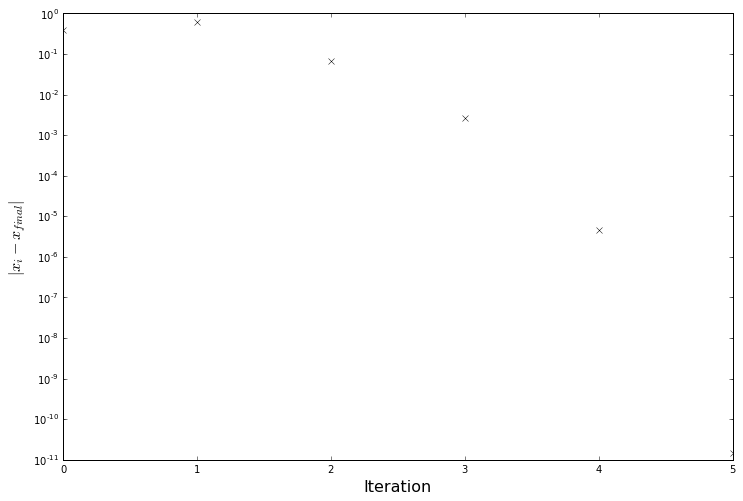

In [2]:
import numpy

def newton(f, df, x0, tolerance = 1e-10, MaxSteps = 100):
    """
    Implementing Newton's method to solve f(x) = 0, 
    where df is the derivative of f, 
    starting from the guess x_0.
    """
    
    x = numpy.zeros(MaxSteps)
    x[0] = x0
    
    # Set up the map g
    g = lambda x: x - f(x) / df(x)
    
    for i in range(1, MaxSteps):
        x[i] = g(x[i-1])
        if (numpy.absolute(f(x[i])) < tolerance):
            break
    return x[:i+1]

def fn_q6(x):
    """
    Simple function defined in question,
    f(x) = sin(x) - e^x + 0.9 + x.
    """
    
    return numpy.sin(x) - numpy.exp(x) + 0.9 + x

def d_fn_q6(x):
    """
    Derivative of simple function defined in question,
    f(x) = sin(x) - e^x + 0.9 + x.
    """
    
    return numpy.cos(x) - numpy.exp(x) + 1.0


x = newton(fn_q6, d_fn_q6, 0.5, tolerance = 1e-15)
print("The root is approximately {:.5} where f is {:.5}"
      " after {} steps.\n".format(x[-1], fn_q6(x[-1]), len(x)))
print("The first three steps are {}\n".format(x[1:4]))
print("The fifth step is ", x[5])

from matplotlib import pyplot

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.semilogy(range(len(x)-1), numpy.absolute(x[:-1] - x[-1]), 'kx')
pyplot.xlabel('Iteration', size = 16)
pyplot.ylabel('$|x_i - x_{final}|$', size = 16)

pyplot.show()

## Coding Question 1

Write a single function that, depending on an input argument, computes the integral of an input function $f(x)$ between the input arguments $a, b$, using either

1. Simpson's rule, 3 points
2. Trapezoidal rule, 3 points
3. Gaussian Quadrature, 3 nodes.

Test your code on

$$
\begin{aligned}
  \int_0^1 \sin^2 ( \pi x ) & = \frac{1}{2}, \\
  \int_0^1 e^{-x} \sinh ( x ) d x & \approx 0.283833821 \\
  \int_0^1 \frac{1}{\sqrt{x}} d x & = 2.
\end{aligned}
$$

Note that there are good reasons for some of the methods to fail on the final test!

### Answer Coding Question 1

In [3]:
def integrate(f, a, b, method = 'Simpson'):
    """
    Integrate a given function f over [a, b] using 3 points/nodes using 
    one of three methods (Simpson, Trapezoidal, Gauss).
    """
    
    if method == 'Simpson':
        h = (b - a) / 2.0
        I = h / 3.0 * (f(a) + f(b) + 4.0 * f( (a + b) / 2.0 ))
    elif method == 'Trapezoidal':
        h = (b - a) / 2.0
        I = h / 2.0 * (f(a) + f(b) + 2.0 * f( (a + b) / 2.0 ))
    elif method == 'Gauss':
        nodes = numpy.array([-numpy.sqrt(3.0/5.0), 0.0, 
                             numpy.sqrt(3.0/5.0)])
        weights = numpy.array([5.0/9.0, 8.0/9.0, 5.0/9.0])
        # Remap [-1, 1] to the given interval
        nodes = (nodes + 1.0) * (b - a) / 2.0 + a
        I = 0
        for i in range(len(nodes)):
            I += weights[i] * f(nodes[i])
        # Reweight
        I *= (b - a) / 2.0
    else:
        raise Exception("method parameter unknown: must be one of "
                        "['Simpson', 'Trapezoidal', 'Gauss']")
    
    return I

def f1(x):
    """First integrand"""
    
    return numpy.sin(numpy.pi * x)**2

def f2(x):
    """Second integrand"""
    
    return numpy.exp(-x) * numpy.sinh(x)

def f3(x):
    """Third integrand"""
    
    return 1.0 / numpy.sqrt(x)

# Now look at the results

exact_solutions = [0.5, 0.283833821, 2.0]

integrand = 0
for i in [f1, f2, f3]:
    integrand +=1
    for m in ['Simpson', 'Trapezoidal', 'Gauss']:
        print("For integrand number {} using method {}\n"
              "the result is {:.5} (exact solution is {:.5})\n"\
              .format(integrand, m, integrate(i, 0, 1, m), 
                      exact_solutions[integrand-1]))


For integrand number 1 using method Simpson
the result is 0.6666666666666666 (exact solution is 0.5)

For integrand number 1 using method Trapezoidal
the result is 0.5 (exact solution is 0.5)

For integrand number 1 using method Gauss
the result is 0.5112271002361874 (exact solution is 0.5)

For integrand number 2 using method Simpson
the result is 0.28276224600646815 (exact solution is 0.283833821)

For integrand number 2 using method Trapezoidal
the result is 0.2661132293025628 (exact solution is 0.283833821)

For integrand number 2 using method Gauss
the result is 0.28383984102814835 (exact solution is 0.283833821)

For integrand number 3 using method Simpson
the result is inf (exact solution is 2.0)

For integrand number 3 using method Trapezoidal
the result is inf (exact solution is 2.0)

For integrand number 3 using method Gauss
the result is 1.7508631779747565 (exact solution is 2.0)



/Users/ih3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in double_scalars


The results for the final integral will fail for those methods that evaluate the integral at $x = 0$.

## Coding Question 2

Implement the secant method to find the root of

$$
  f(x) = \tan (x) - e^{-x}, \quad x \in [0, 1].
$$

### Answer Coding Question 2

The root is approximately 0.53139 where f is -1.1102e-16 after 8 steps.



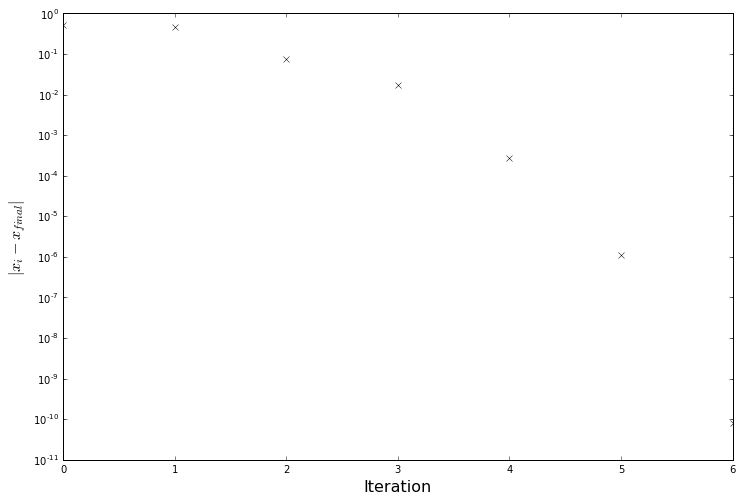

In [4]:
def Secant(f, x0, x1, tolerance = 1e-10, MaxSteps = 100):
    """
    Implement the secant method to find the root of the equation f(x) = 0, 
    starting from the initial guesses x^{(0,1)} = x0, x1
    """
    
    x = numpy.zeros(MaxSteps)
    x[0] = x0
    x[1] = x1
    
    # There is no map!
    for i in range(2, MaxSteps):
        x[i] = x[i-1] - f(x[i-1]) * \
             (x[i-1] - x[i-2]) / (f(x[i-1]) - f(x[i-2]))
        if (numpy.absolute(f(x[i])) < tolerance):
            break
    return x[:i+1]

# Now define the function whose root is to be found
def fn_q2(x):
    """
    Simple function defined in question, f(x) = tan(x) - exp(-x).
    """
    
    return numpy.tan(x) - numpy.exp(-x)


x = Secant(fn_q2, 0.0, 1.0)
print("The root is approximately {:.5} where f is {:.5}"
      " after {} steps.\n".format(x[-1], fn_q2(x[-1]), len(x)))

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.semilogy(range(len(x)-1), numpy.absolute(x[:-1] - x[-1]), 'kx')
pyplot.xlabel('Iteration', size = 16)
pyplot.ylabel('$|x_i - x_{final}|$', size = 16)

pyplot.show()